<a href="https://colab.research.google.com/github/sidba2003/Benzene/blob/main/Assignment1_Siddharth_Bahl_210204809.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from sklearn.datasets import load_wine

data = load_wine()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = pd.Series(data.target)

Question 1.> (a) The wine dataset includes a categorical feature labeled target, which represents the class of each wine sample. It has three unique values corresponding to three different wine classes.

In [2]:
frequencies = df['target'].value_counts(normalize=True)
print(frequencies)

target
1    0.398876
0    0.331461
2    0.269663
Name: proportion, dtype: float64


Question 1.> (b)

In [20]:
univariate_summary = df.describe().loc[['mean', 'std']].transpose()

# Multivariate summaries: Correlation and Covariance matrices
correlation_matrix = df.corr()
covariance_matrix = df.cov()

Question 1.> (c)

In [6]:
median_summary_by_target = df.groupby('target').median()

print(median_summary_by_target)


        alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  \
target                                                            
0        13.750       1.770  2.44               16.8      104.0   
1        12.290       1.610  2.24               20.0       88.0   
2        13.165       3.265  2.38               21.0       97.0   

        total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
target                                                                     
0               2.800       2.980                  0.29            1.870   
1               2.200       2.030                  0.37            1.610   
2               1.635       0.685                  0.47            1.105   

        color_intensity    hue  od280/od315_of_diluted_wines  proline  
target                                                                 
0                  5.40  1.070                          3.17   1095.0  
1                  2.90  1.040                          2.83    495

Question 1.> (d)

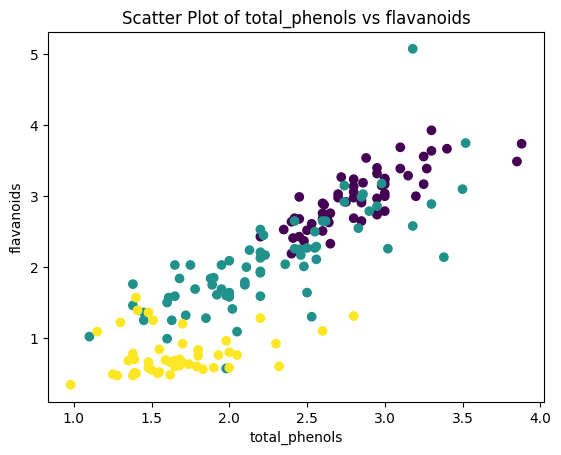

In [11]:
import matplotlib.pyplot as plt

# Identify the pair with the highest correlation
correlation_matrix = df.corr().abs()
sorted_correlations = correlation_matrix.unstack().sort_values(ascending=False)
highest_corr_pair = sorted_correlations[sorted_correlations < 1].idxmax()

# Scatter plot for the pair with the highest correlation
plt.scatter(df[highest_corr_pair[0]], df[highest_corr_pair[1]], c=df['target'])
plt.xlabel(highest_corr_pair[0])
plt.ylabel(highest_corr_pair[1])
plt.title(f"Scatter Plot of {highest_corr_pair[0]} vs {highest_corr_pair[1]}")
plt.show()

Question 2.>

In [14]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Load dataset
df_country_income = pd.read_csv('country-income.csv')

numeric_cols = df_country_income.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = df_country_income.select_dtypes(include=['object']).columns

# Fill NaN values in numeric columns with the mean
imputer = SimpleImputer(strategy='mean')
df_country_income[numeric_cols] = imputer.fit_transform(df_country_income[numeric_cols])

for col in categorical_cols:
    le = LabelEncoder()
    df_country_income[col] = le.fit_transform(df_country_income[col])

print(df_country_income)


   Region        Age        Income  Online Shopper
0       1  49.000000  86400.000000               0
1       0  32.000000  57600.000000               1
2       2  35.000000  64800.000000               0
3       0  43.000000  73200.000000               0
4       2  45.000000  76533.333333               1
5       1  40.000000  69600.000000               1
6       0  43.777778  62400.000000               0
7       1  53.000000  94800.000000               1
8       2  55.000000  99600.000000               0
9       1  42.000000  80400.000000               1


Question 3.> Both correlations are relatively strong and positive, indicating that as height increases, shoe size tends to increase as well for both genders. The correlation is slightly stronger in males than in females, suggesting a closer relationship between height and shoe size for male subjects. The scatter plots confirm this trend, with an upward pattern for both genders.

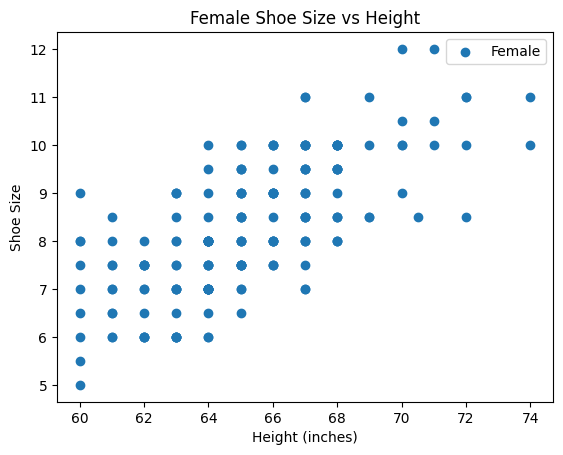

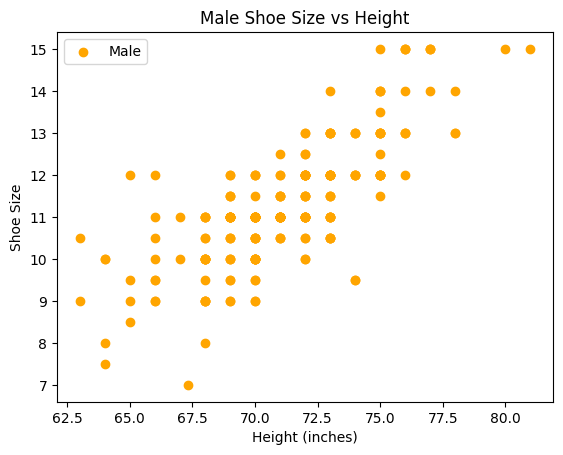

Pearson correlation for females: 0.7078119417143971
Pearson correlation for males: 0.7677093547300977


In [18]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

file_path = 'shoesize.csv'
df_shoesize = pd.read_csv(file_path)

female_data = df_shoesize[df_shoesize['Gender'] == 'F']
male_data = df_shoesize[df_shoesize['Gender'] == 'M']

# Scatter plot
plt.scatter(female_data['Height'], female_data['Size'], label='Female')
plt.xlabel('Height (inches)')
plt.ylabel('Shoe Size')
plt.title('Female Shoe Size vs Height')
plt.legend()
plt.show()

plt.scatter(male_data['Height'], male_data['Size'], label='Male', color='orange')
plt.xlabel('Height (inches)')
plt.ylabel('Shoe Size')
plt.title('Male Shoe Size vs Height')
plt.legend()
plt.show()

# Compute Pearson correlation coefficients
corr_female, _ = pearsonr(female_data['Height'], female_data['Size'])
corr_male, _ = pearsonr(male_data['Height'], male_data['Size'])

print("Pearson correlation for females:", corr_female)
print("Pearson correlation for males:", corr_male)


Question 4.>

**Interpretation of Results**

1.> Without Standardization: In the initial scatter plot, some overlap between classes might be observed, making it harder to distinguish between them. This is often due to variations in feature scale, where features with larger numerical ranges dominate the PCA transformation.

2.> With Standardization: After standardizing, features have equal variance, allowing PCA to focus more on differences in patterns rather than absolute values. This often results in better class separation, making it easier to distinguish between classes in the PCA plot.


**Why Standardization Helps**

PCA is sensitive to the scale of features, and without standardization, features with larger ranges can overshadow smaller features, potentially leading to class overlap. By standardizing, each feature contributes equally, which usually enhances PCA's ability to reveal true patterns and class separations.

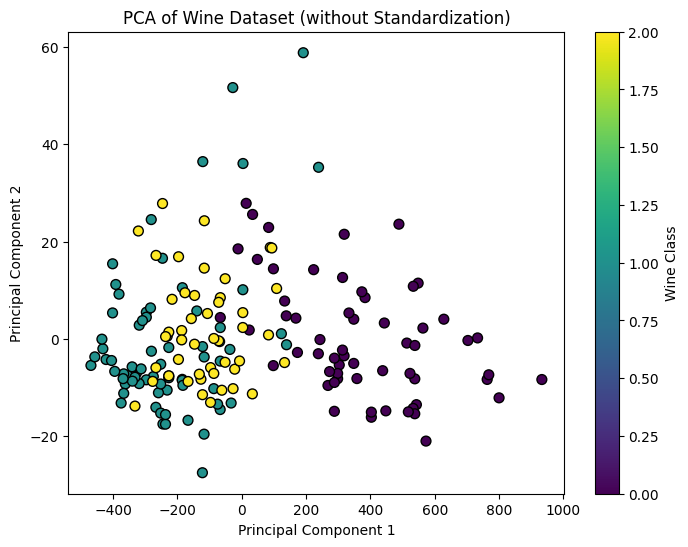

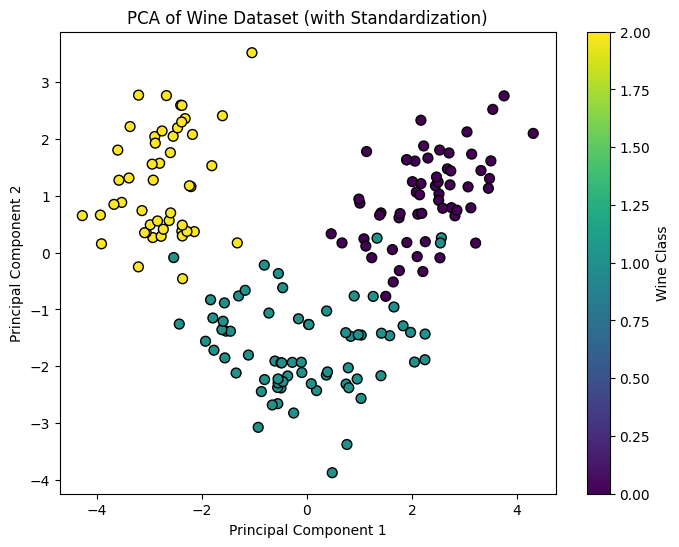

In [21]:
from sklearn.datasets import load_wine
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pandas as pd

# Load the wine dataset
data = load_wine()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = pd.Series(data.target)

X = df.drop(columns='target')
y = df['target']

# Perform PCA without standardizing the data
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Plot the scatter plot of the two principal components (without scaling)
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', edgecolor='k', s=50)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Wine Dataset (without Standardization)')
plt.colorbar(label='Wine Class')
plt.show()

# Standardize the data to alleviate overlap
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)
X_pca_scaled = pca.fit_transform(X_scaled)

# Plot the scatter plot of the two principal components (with scaling)
plt.figure(figsize=(8, 6))
plt.scatter(X_pca_scaled[:, 0], X_pca_scaled[:, 1], c=y, cmap='viridis', edgecolor='k', s=50)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Wine Dataset (with Standardization)')
plt.colorbar(label='Wine Class')
plt.show()


Question 5.>


To classify the observations x3 = (3, 2) and x4 = (0, 1) using a 1-nearest neighbor classifier based on the Euclidean distance:


**Classifying x3 = (3, 2)**:



1.   Calculate the Euclidean distance between x3 and x1:


```
d(x3, x1) = sqrt((3 - 1)^2 + (2 - 2)^2) = sqrt(4) = 2
```


2.   Calculate the Euclidean distance between x3 and x2:


```
d(x3, x2) = sqrt((3 + 1)^2 + (2 - 0)^2) = sqrt(16 + 4) = sqrt(20) ≈ 4.47

```

Since x3 is closer to x1, which has class y1 = 1, the classifier will classify x3 as class 1.


**Classifying x4 = (0, 1)**:



1.   Calculate the Euclidean distance between x4 and x1:

```
d(x4, x1) = sqrt((0 - 1)^2 + (1 - 2)^2) = sqrt(1 + 1) = sqrt(2) ≈ 1.41
```

2.   Calculate the Euclidean distance between x4 and x2:


```
d(x4, x2) = sqrt((0 + 1)^2 + (1 - 0)^2) = sqrt(1 + 1) = sqrt(2) ≈ 1.41
```

Since x4 has an equal distance to both x1 and x2, the classifier may choose the class of the nearest point by index order or based on implementation specifics. In this case, it could classify x4 as class 1 by default.









